In [95]:
#importing libraries
from sklearn.ensemble import RandomForestClassifier
import pandas as pd 
import numpy as np
import json
import matplotlib.pyplot as plt

In [96]:
#loading json file
data = json.load(open("musicFixed.json"))
songs = data['Music Data']['songs']
df = pd.DataFrame(songs)
df

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
802,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
803,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
804,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
805,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


In [97]:
#scale data
features = ['in_spotify_playlists', 'in_spotify_charts', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_charts', "in_shazam_charts", 'bpm', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'liveness_%', 'speechiness_%']

X = df.loc[:, features].values
y = df.loc[:,['streams']].values
y = y.astype('int64')

In [98]:
#Random Forest to find importance numbers
model = RandomForestClassifier()
model.fit(X, y)

features2 = features
importances = model.feature_importances_
indicies = np.argsort(importances)

c:\Program Files\Python39\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


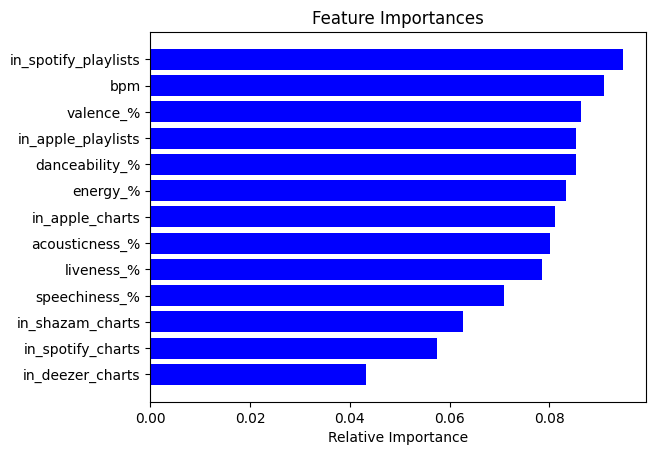

In [99]:
#graph feature importances for model to better understand what is important when running model
plt.title('Feature Importances')
plt.barh(range(len(indicies)), importances[indicies], color='b', align='center')
plt.yticks(range(len(indicies)), [features[i] for i in indicies])
plt.xlabel('Relative Importance')
plt.show()

Graphing the importance of the features is important to know what makes a song popular, and what makes a song pop on the charts.
We see a couple of things:
  - Song wise, we find that valence%, bpm, and energy% are the top 3 things in a song that hooks people into a song and makes it popular...
      - valence%: The musical positiveness conveyed by a track.
      - bpm: Beats per minute - a measure of tempo in music.
      - energy%: The perceived energy of a track.
      - danceability%: A measure of how suitable a track is for dancing.

  - Outside of the music, the importance shows that you would want your song in Spotify/Apple Music playlists. This would mean that your song will be played
  over and over again. The data shows that people, instead of looking up a song one-by-one, would just put your song in a playlist and would be played a lot.
      - Shows that Deezer and Shazam charts aren't as important, probably not as used as the two streaming giants.

In [100]:
#Importing more libraries
from sklearn.model_selection import train_test_split

In [101]:
print(X.shape, y.shape)

#move 80% of the data to the training data, and 20% of the data to the test.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

(807, 13) (807, 1)


In [102]:
X_train.shape, y_train.shape

((645, 13), (645, 1))

In [103]:
X_test.shape, y_test.shape

((162, 13), (162, 1))

In [104]:
#Now create Linear Regression Model
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [105]:
model = linear_model.LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [106]:
Y_pred = model.predict(X_test)
Y_pred = Y_pred.astype('int64')

In [107]:
#Model performance
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print('Mean Squared Error: %.2f' % mean_squared_error(y_test, Y_pred))
print("Coefficient of determination (R^2): %.2f" % r2_score(y_test, Y_pred))

Coefficients: [[   32246.97519683  5124199.5610921   2672647.87922652   139830.45156448
  -1404647.06398279  -628946.53632468    19005.828642    -415415.97502563
   -674628.39940885 -1299304.94704401   679684.46690583  -496944.8522554
   -702761.70112754]]
Intercept: [2.60346524e+08]
Mean Squared Error: 66397941209300904.00
Coefficient of determination (R^2): 0.75


##### From these coefficients, we can find the equation for the prediction of streams, which we will apply to the user input below.

##### R2 ranges from 0.61-0.77 from the multiple times that I've ran the model. It seems that it is in the upper half of an R2 score, meaning that our model seems to be pretty good. I think the R2 changes due ot the fact that the 80-20 split of train/test data changes every time you run.

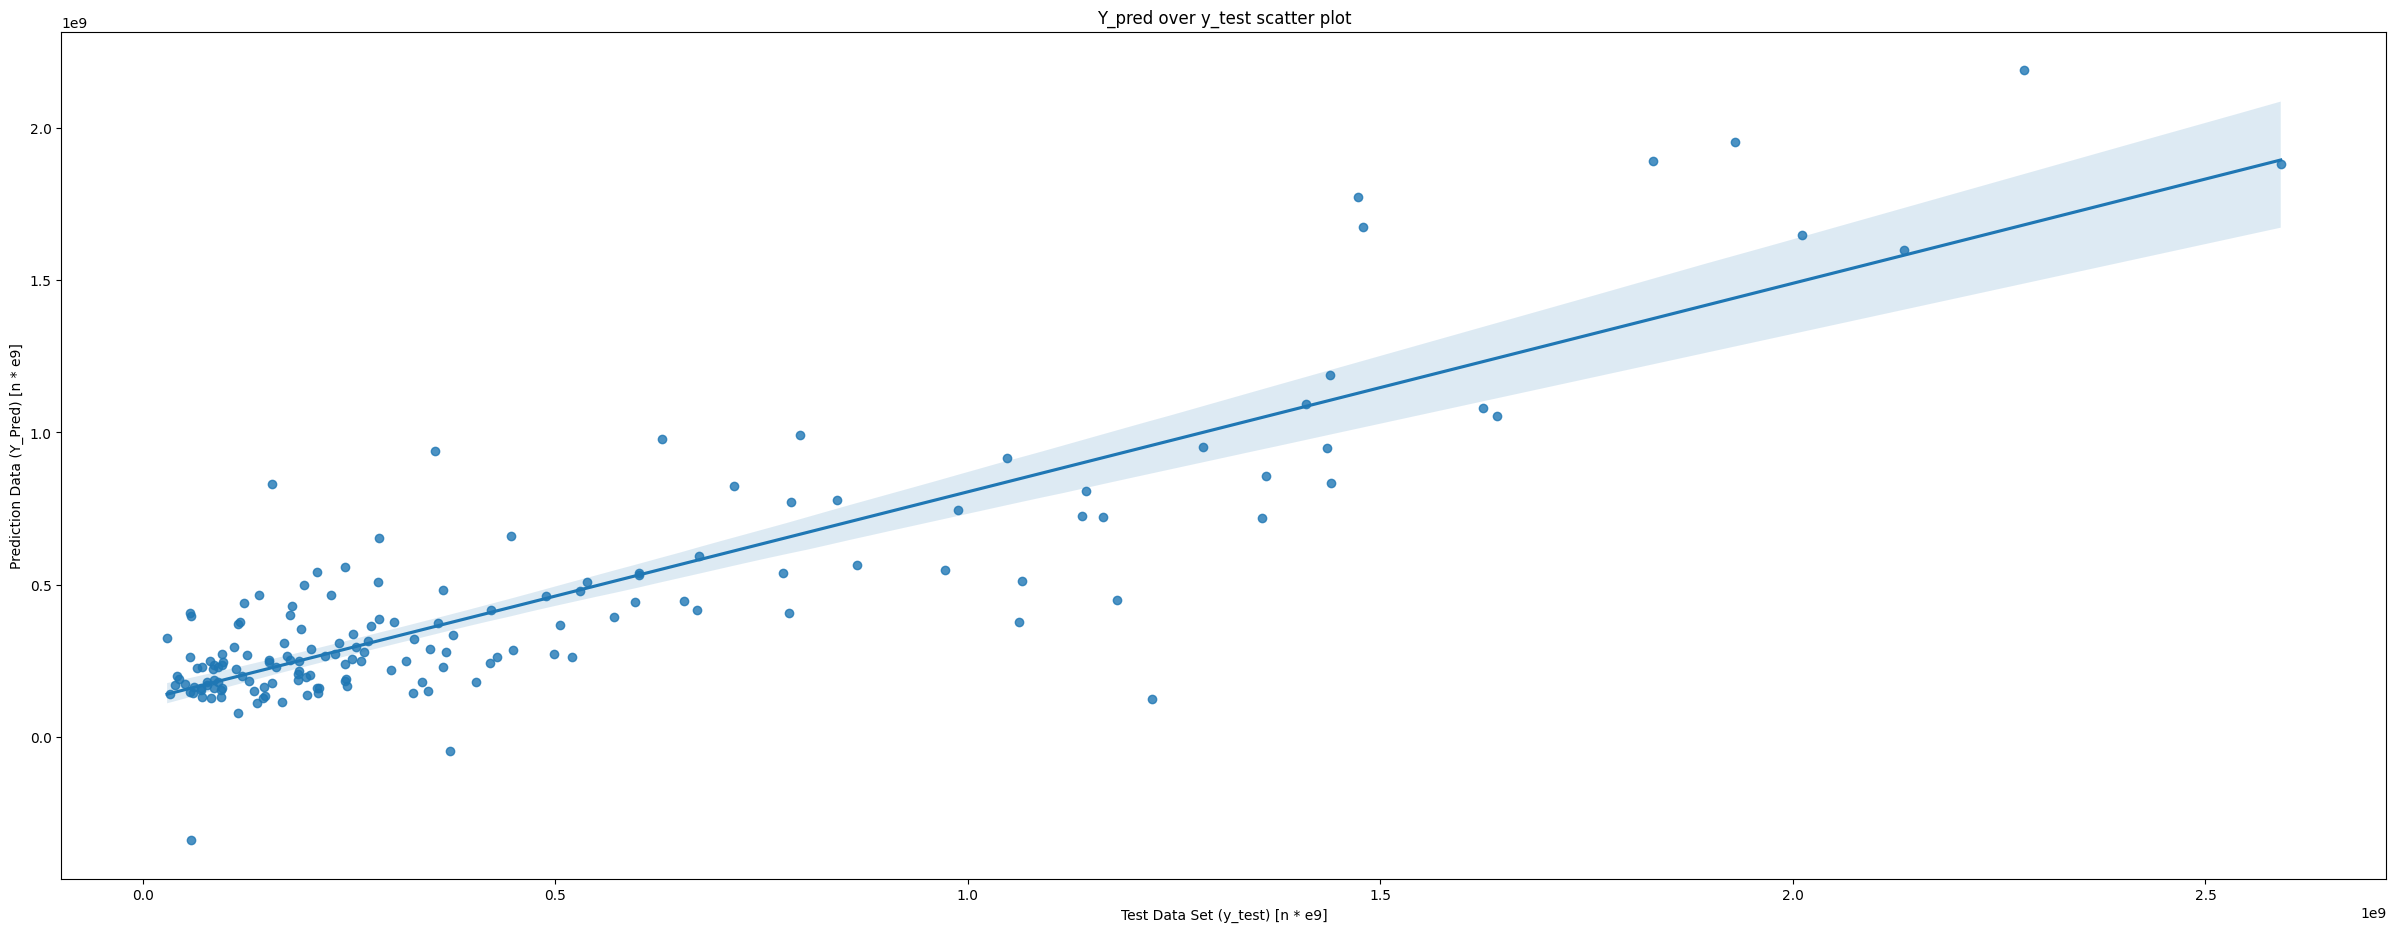

In [108]:
#Plotting Graph Y Pred of Y Test
import seaborn as sns

plt.figure(figsize=(30, 11))
sns.regplot(x=y_test, y=Y_pred)
plt.xlabel("Test Data Set (y_test) [n * e9]")
plt.ylabel("Prediction Data (Y_Pred) [n * e9]")
plt.title("Y_pred over y_test scatter plot")
plt.show()


##### With this Linear Regression set up, we would be able to take in user information based on song statistics and predict how many streams it would get based on that criteria.

##### To ask a user about their songs, we should ask the user for Dancability, Valence, Energy, Acousticness, Speechiness, and liveness between 0 - 100. BPM will be betweeen 0 - 300. 

In [109]:
import random as rand 

in_spotify_playlists = rand.randint(1, 100)
in_spotify_charts = rand.randint(1, 100)
in_apple_playlists = rand.randint(1, 100)
in_apple_charts = rand.randint(1, 100)
in_deezer_charts = rand.randint(1, 100)
in_shazam_charts = rand.randint(1, 100)
bpm = input('What is the bpm of the song? (0 - 200)')
danceability_ = input('What is the danceability of the song?: (0 - 100)')
valence_ = input('What is the valence of the song? How positive is it?: (0 - 100)')
energy_ = input('What is the energy of the song?: (0 - 100)')
acousticness_ = input('What is the acousticness of the song?: (0 - 100)')
liveness_ = input('What is the liveness of the song? What is the amount of live elements?: (0 - 100)')
speechiness_ = input('What is the amount of speechiness in your song? How much spoken word is in it?: (0 -100)')

predStreams = model.coef_[0, 0]*(in_spotify_playlists) + model.coef_[0, 1]*(in_spotify_charts) + model.coef_[0, 2]*(in_apple_playlists) + model.coef_[0, 3]*(in_apple_charts) + model.coef_[0, 4]*(in_deezer_charts) + model.coef_[0, 5]*(in_shazam_charts) + model.coef_[0, 6]*(int(bpm)) + model.coef_[0, 7]*(int(danceability_)) + model.coef_[0, 8]*(int(valence_))  + model.coef_[0, 9]*(int(energy_))  + model.coef_[0, 10]*(int(acousticness_)) + model.coef_[0, 11]*(int(liveness_)) + model.coef_[0, 12]*(int(speechiness_))

outputString = str(format(round(abs(predStreams)), ","))
print("Your predicted amount of streams your song will get is: " + outputString + " if all goes according to plan. Calculated with your song being added to...")
print(str(in_spotify_playlists) + " Spotify Playlists")
print(str(in_apple_playlists) + " Apple Playlists")
print(str(in_spotify_charts) + " Spotify Charts")
print(str(in_apple_charts) + " Apple Charts")
print(str(in_deezer_charts) + " Deezer Charts")
print(str(in_shazam_charts) + " Shazam Charts")
print("(This is calculated with random playlist and chart numbers from 1-100. This is accounted to the luck that artists have to have to get put into playlists and charts.)")


Your estimated amount of streams your song will get is: 187,285,220 if all goes according to plan. Calculated with your song being added to...
62 Spotify Playlists
9 Apple Playlists
56 Spotify Charts
73 Apple Charts
64 Deezer Charts
64 Shazam Charts
(This is calculated with random playlist and chart numbers from 1-100. This is accounted to the luck that artists have to have to get put into playlists and charts.)
